In [12]:
import numpy as np
import pandas as pd
import os

import warnings
warnings.filterwarnings('ignore')

In [13]:
train_data = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [14]:
train_data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [16]:
from sklearn.impute import KNNImputer

train_data['Transported'] = train_data['Transported']*1
train_data['CryoSleep'] = train_data['CryoSleep']*1
test_data['CryoSleep'] = test_data['CryoSleep']*1

imputer = KNNImputer(n_neighbors=2, weights="uniform")

train_data[["Deck", "Num", "Side"]] = train_data["Cabin"].str.split("/", expand=True)
train_data[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'CryoSleep', 'Num']] = imputer.fit_transform(train_data[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'CryoSleep', 'Num']])

test_data[["Deck", "Num", "Side"]] = test_data["Cabin"].str.split("/", expand=True)
test_data[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'CryoSleep', 'Num']] = imputer.fit_transform(test_data[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'CryoSleep', 'Num']])

train_data['HomePlanet'].fillna("Earth", inplace=True)
train_data['Destination'].fillna("TRAPPIST-1e", inplace=True)
train_data['Deck'].fillna("F", inplace=True)
train_data['Side'].fillna("P", inplace=True)

test_data['HomePlanet'].fillna("Earth", inplace=True)
test_data['Destination'].fillna("TRAPPIST-1e", inplace=True)
test_data['Deck'].fillna("F", inplace=True)
test_data['Side'].fillna("P", inplace=True)

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data["Deck"]= le.fit_transform(train_data["Deck"])

le = LabelEncoder()
train_data["Num"]= le.fit_transform(train_data["Num"])

le = LabelEncoder()
train_data["Side"]= le.fit_transform(train_data["Side"])

le = LabelEncoder()
test_data["Deck"]= le.fit_transform(test_data["Deck"])

le = LabelEncoder()
test_data["Num"]= le.fit_transform(test_data["Num"])

le = LabelEncoder()
test_data["Side"]= le.fit_transform(test_data["Side"])

In [18]:
train_data['AllSpending'] = train_data['RoomService'] + train_data['ShoppingMall'] + train_data['FoodCourt'] + train_data['Spa'] + train_data['VRDeck']
test_data['AllSpending'] = test_data['AllShop'] = test_data['RoomService'] + test_data['ShoppingMall'] + test_data['FoodCourt'] + test_data['Spa'] + test_data['VRDeck']

In [19]:
from sklearn.preprocessing import StandardScaler

y = train_data["Transported"]

features = ["CryoSleep","RoomService","Spa","VRDeck","Deck","Side","AllSpending"]

cols_to_normalize = ["RoomService","Spa","VRDeck","AllSpending"]
scaler = StandardScaler()

train_data[cols_to_normalize ] = scaler.fit_transform(train_data[cols_to_normalize ])
test_data[cols_to_normalize ] = scaler.transform(test_data[cols_to_normalize ])

X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

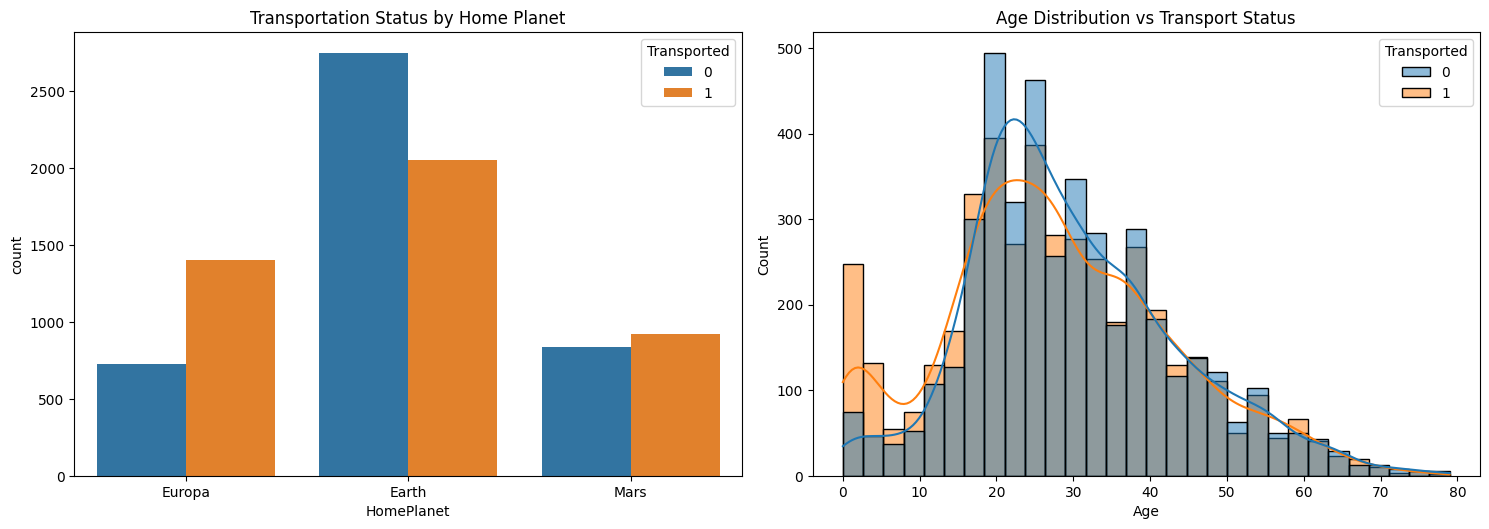

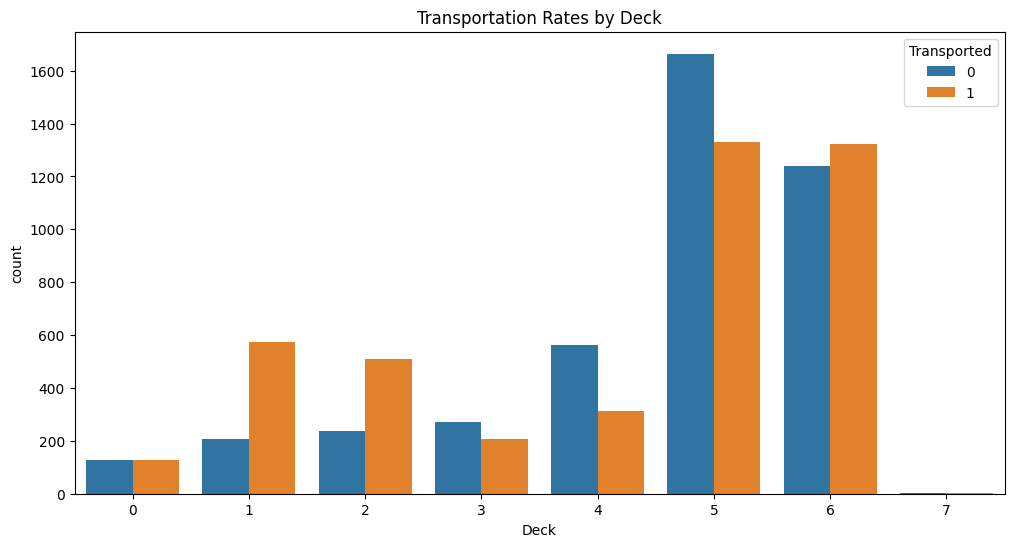

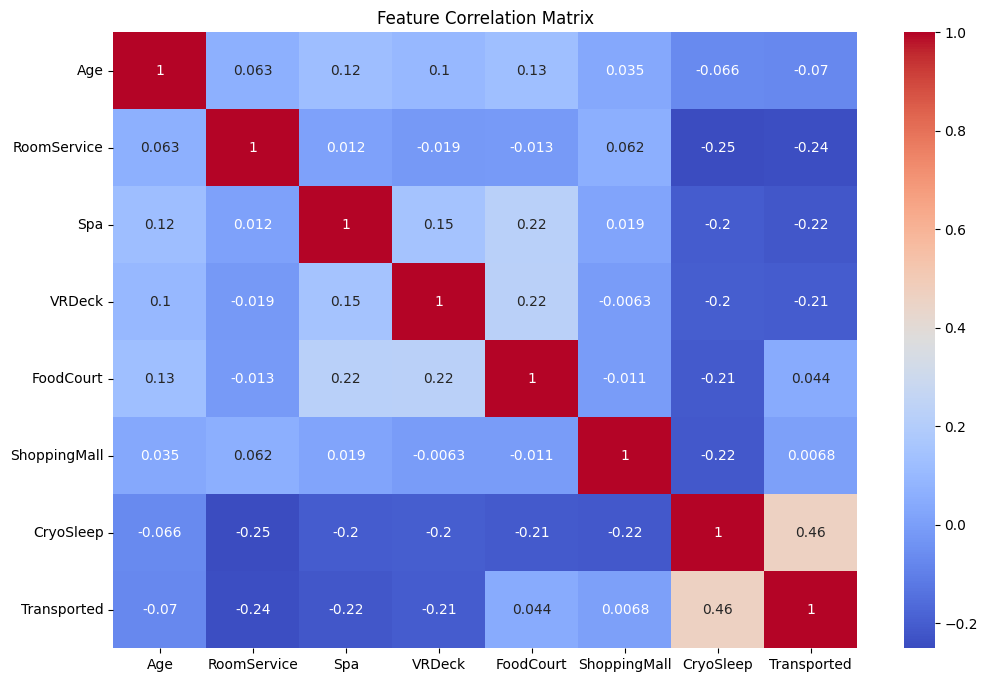

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 15))

plt.subplot(3, 2, 1)
sns.countplot(x='HomePlanet', hue='Transported', data=train_data)
plt.title('Transportation Status by Home Planet')

plt.subplot(3, 2, 2)
sns.histplot(data=train_data, x='Age', hue='Transported', bins=30, kde=True)
plt.title('Age Distribution vs Transport Status')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Deck', hue='Transported', data=train_data, 
             order=sorted(train_data['Deck'].unique()))
plt.title('Transportation Rates by Deck')
plt.show()

plt.figure(figsize=(12, 8))
corr_matrix = train_data[['Age', 'RoomService', 'Spa', 'VRDeck',
                         'FoodCourt', 'ShoppingMall', 'CryoSleep', 'Transported']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

cat_model = CatBoostClassifier(max_depth=8, learning_rate=0.05, verbose=0)
cat_model.fit(X_train, y_train)

val_pred = cat_model.predict(X_val)
print("Confusion Matrix (Validation):")
print(confusion_matrix(y_val, val_pred))
val_accuracy = accuracy_score(y_val, val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")

Confusion Matrix (Validation):
[[644 217]
 [146 732]]
Validation Accuracy: 0.7913


In [22]:
cat_model.fit(X, y)

predictions = cat_model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Transported': predictions})
output = output.replace({0: False, 1: True})
output.to_csv('submission.csv', index=False)
print("Submission was successfully saved!")

Submission was successfully saved!
